<a href="https://colab.research.google.com/github/yavuzuzun/projects/blob/main/twitter_analysis_and_dimensionality_reduction_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Spring 2023: Int. to Statistical Machine Learning

Yavuz Selim Uzun Team member: Soner Seckiner

# Problem Set 3
## Q1) [10 points] Using the pandas package for Python, import the corona_fake.csv dataset, and do the following:

Import the nltk package. Check the documentation: https://www.nltk.org/. And, do the following:
- i. [2 points] Using nltk.word_tokenize(), tokenize the text.
- ii. [2 points] Using the POS-tagging feature (nltk.pos_tag), POS-tag the tokenized words.
- iii. [2 points] Using WordNetLemmatizer (from nltk.stem import WordNetLemmatizer) lemmatize the pos-tagged words you obtained above. (Hint: If there is no available tag, append the token as is; else, use the tag to lemmatize the token)
- iv. [2 points] Using the list of stop words that can be imported (nltk.corpus import stopwords), remove the stopwords in lemmatized text [Note: the language needs to be set as ‘english’.].
- v. [2 points] Finally, also remove numbers, words that are shorter than 2 characters, punctuation, links and emojis. Finally, convert the obtained list of tokenized+tagged+lemmatized+cleaned list of words back into a joined string (joined by space ‘ ‘ ) and add the result as text_clean column to your dataset.


In [ ]:
import numpy as np
import pandas as pd

### Import data from local file

In [ ]:
import io
fakeC = pd.read_csv('corona_fake.csv')
fakeC # Inspect the data frame

title  \
0     Due to the recent outbreak for the Coronavirus...   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1154   Could the Power of the Sun Slow the Coronavirus?   
1155  Key evidence for coronavirus spread is flawed ...   
1156  Summer Heat May Not Diminish Coronavirus Strength   
1157               How Long Will a Vaccine Really Take?   
1158  Why Funding the Covid-19 Response Could Be the...   

                                                   text  \
0     You just need to add water, and the drugs and ...   
1     Hydroxychloroquine has been shown to have a 10...   
2     Fact: Hydroxychloroquine has been shown to hav...   
3     The Corona virus is a man made virus created i...   
4     Doesn’t @BillGates finance research at the Wuh...   
...                                                 ...   
1154  A study suggests that ultraviolet rays could s...   
1155  Last week, a medical journal reported that a b...   
1156  A new report, sent to the White House science ...   
1157  A vaccine would be the ultimate weapon against...   
1158  Developing and delivering coronavirus vaccines...   

                         source label  
0     coronavirusmedicalkit.com  fake  
1                  RudyGiuliani  fake  
2                   CharlieKirk  fake  
3       JoanneWrightForCongress  fake  
4       JoanneWrightForCongress  fake  
...                         ...   ...  
1154   https://www.nytimes.com/  true  
1155   https://www.nytimes.com/  true  
1156   https://www.nytimes.com/  true  
1157   https://www.nytimes.com/  true  
1158   https://www.nytimes.com/  true  

[1159 rows x 4 columns]

### Import necessary packages and define necessary functions

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import nltk

nltk.download('stopwords')
# some other required downloads
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('universal_tagset')

# we need to change tags to wordnet format
def tag_change(tweet):
    if tweet.startswith('J'):
        return wordnet.ADJ
    elif tweet.startswith('N'):
        return wordnet.NOUN
    elif tweet.startswith('V'):
        return wordnet.VERB
    elif tweet.startswith('R'):
        return wordnet.ADV
    else:          
        return None

tokanizr = nltk.tokenize.TweetTokenizer()
lemmatizr = nltk.stem.WordNetLemmatizer()
def tweet_lemmatize(tweet):
    tweet_t = nltk.pos_tag(tokanizr.tokenize(tweet))  
    tweet_tagged = map(lambda x: (x[0], tag_change(x[1])), tweet_t)

    tweet_l = []
    for word, tag in tweet_tagged:
        if tag is None:
            tweet_l.append(word)
        else:        
            tweet_l.append(lemmatizr.lemmatize(word, tag))
    return tweet_l


stop_words = set(stopwords.words("english"))
stop_words2 = ['%','-','_','’','!',',','.',':','&','#']
stopwords_list = stop_words.union(stop_words2)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sseckine\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sseckine\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sseckine\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sseckine\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sseckine\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sseckine\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sseckine\App

### Iterate the functions over the tweets

In [ ]:
for ind, row in fakeC.iterrows():
  # get tweet
  tweet = row['text']

  # continue if the tweet is nan
  if pd.isna(row['text']):
        continue 
  
  # tokenisation, stopwords removal and lemmatisation
  tweet = tweet_lemmatize(tweet)

  # remove stop words
  tweet = [i.lower() for i in tweet if i.lower() not in stopwords_list]

  # remove numbers
  tweet = [re.sub(r'\d+', '', str(i)) for i in tweet]

  # define url type
  url_set = re.compile(r"https?://\S+|www\.\S+")
  tweet = [url_set.sub(r"", i) for i in tweet]

  # define html type
  html_set = re.compile(r"<.*?>")
  tweet = [html_set.sub(r"", i) for i in tweet]

  # set of emoji unicode
  emoji_set = re.compile("["
      u"\U0001F600-\U0001F64F"  
      u"\U0001F300-\U0001F5FF"  
      u"\U0001F680-\U0001F6FF"  
      u"\U0001F1E0-\U0001F1FF"  
                        "]+", flags=re.UNICODE)
  tweet = [emoji_set.sub(r'', i) for i in tweet]

  # save processed tweet into the new column
  fakeC.loc[ind, 'text_clean'] = ' '.join(tweet)

In [ ]:
fakeC

title  \
0     Due to the recent outbreak for the Coronavirus...   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1154   Could the Power of the Sun Slow the Coronavirus?   
1155  Key evidence for coronavirus spread is flawed ...   
1156  Summer Heat May Not Diminish Coronavirus Strength   
1157               How Long Will a Vaccine Really Take?   
1158  Why Funding the Covid-19 Response Could Be the...   

                                                   text  \
0     You just need to add water, and the drugs and ...   
1     Hydroxychloroquine has been shown to have a 10...   
2     Fact: Hydroxychloroquine has been shown to hav...   
3     The Corona virus is a man made virus created i...   
4     Doesn’t @BillGates finance research at the Wuh...   
...                                                 ...   
1154  A study suggests that ultraviolet rays could s...   
1155  Last week, a medical journal reported that a b...   
1156  A new report, sent to the White House science ...   
1157  A vaccine would be the ultimate weapon against...   
1158  Developing and delivering coronavirus vaccines...   

                         source label  \
0     coronavirusmedicalkit.com  fake   
1                  RudyGiuliani  fake   
2                   CharlieKirk  fake   
3       JoanneWrightForCongress  fake   
4       JoanneWrightForCongress  fake   
...                         ...   ...   
1154   https://www.nytimes.com/  true   
1155   https://www.nytimes.com/  true   
1156   https://www.nytimes.com/  true   
1157   https://www.nytimes.com/  true   
1158   https://www.nytimes.com/  true   

                                             text_clean  
0     need add water drug vaccine ready administer t...  
1     hydroxychloroquine show  effective rate treat ...  
2     fact hydroxychloroquine show  effective rate t...  
3     corona virus man make virus create wuhan labor...  
4     @billgates finance research wuhan lab corona v...  
...                                                 ...  
1154  study suggest ultraviolet ray could slow virus...  
1155  last week medical journal report business trav...  
1156  new report send white house science adviser sa...  
1157  vaccine would ultimate weapon coronavirus best...  
1158  developing deliver coronavirus vaccine test tr...  

[1159 rows x 5 columns]

## Q2) [10 points] Let’s vectorize the data we produced above by using two approaches: Bag of Words (BOW) and TF-IDF; and, at the end, we will make a prediction:
- a. [2.5 points] Read the following page: https://en.wikipedia.org/wiki/N-gram. Explain what an ‘n-gram’ is and why it is helpful in max. 200 words.
- b. [2.5 points] Import CountVectorizer and TfidfVectorizer:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
- c. [2.5 points] Using CountVectorizer, create three vectorized representations of text_clean [set lowercase=True]:
i. One vectorized representation where ngram_range = (1,1)
ii. One vectorized representation where ngram_range = (1,2)
iii. One vectorized representation where ngram_range = (1,3)
- d. [2.5 points] Using TfidfVectorizer, create three vectorized representations of text_clean [set lowercase=True]:
i. One vectorized representation where ngram_range = (1,1)
ii. One vectorized representation where ngram_range = (1,2)
iii. One vectorized representation where ngram_range = (1,3)

### 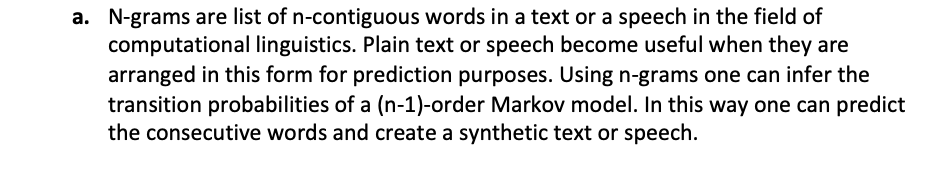

### b

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import defaultdict

In [ ]:
fakeC["text_clean"][0]

'need add water drug vaccine ready administer two part kit one hold pellet contain chemical machinery synthesise end product hold pellet contain instruction telll drug compound create mix two part together chosen combination add water treatment ready'

In [ ]:
type(fakeC["text_clean"])

pandas.core.series.Series

In [ ]:
#for ind, row in fakeC.iterrows():
# tweet = row['text_clean'].lower()
tweets = fakeC["text_clean"].astype(str)
#print(tweets.values.tolist())
  # get n-grams with CV

#Question c
ngramCV1 = CountVectorizer(ngram_range=(1, 1), lowercase=True).fit_transform(tweets.values.tolist())
ngramCV2 = CountVectorizer(ngram_range=(1, 2), lowercase=True).fit_transform(tweets.values.tolist())
ngramCV3 = CountVectorizer(ngram_range=(1, 3), lowercase=True).fit_transform(tweets.values.tolist())

#Question d
# get n-grams with
ngramTFID1 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True).fit_transform(tweets.values.tolist())
ngramTFID2 = TfidfVectorizer(ngram_range=(1, 2), lowercase=True).fit_transform(tweets.values.tolist())
ngramTFID3 = TfidfVectorizer(ngram_range=(1, 3), lowercase=True).fit_transform(tweets.values.tolist())

In [ ]:
print(ngramTFID1)

  (0, 16397)	0.08518888879658894
  (0, 3004)	0.13712477435076828
  (0, 2680)	0.23457324725106024
  (0, 16188)	0.11535357544652056
  (0, 10243)	0.16739874750751796
  (0, 3644)	0.08871138578911385
  (0, 3130)	0.1741643314761559
  (0, 15885)	0.24824344572693113
  (0, 8266)	0.15079497282663917
  (0, 12526)	0.11470519281319813
  (0, 5217)	0.09085760121152292
  (0, 15702)	0.23457324725106024
  (0, 9523)	0.19398147531911925
  (0, 2590)	0.13413920914882427
  (0, 3353)	0.1883639056829658
  (0, 11754)	0.49648689145386227
  (0, 7413)	0.22627355419941217
  (0, 11176)	0.05993334716293478
  (0, 8894)	0.1659000626520421
  (0, 11616)	0.16749684672253104
  (0, 16542)	0.14900190449893524
  (0, 236)	0.1440293888580012
  (0, 13061)	0.2530037233152324
  (0, 17029)	0.07430662976435437
  (0, 4817)	0.1894202674806126
  :	:
  (1158, 11349)	0.034565661114276704
  (1158, 3497)	0.04486294029739503
  (1158, 12730)	0.10302990207108155
  (1158, 7209)	0.06875316448280182
  (1158, 6579)	0.02449434586610425
  (1158, 68

In [ ]:
print(ngramTFID1.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(ngramCV1.toarray().shape)
print(ngramCV2.toarray().shape)
print(ngramCV3.toarray().shape)

print(ngramTFID1.toarray().shape)
print(ngramTFID2.toarray().shape)
print(ngramTFID3.toarray().shape)

(1159, 17976)
(1159, 237774)
(1159, 544013)
(1159, 17976)
(1159, 237774)
(1159, 544013)


## Q3) [10 points] Now, let’s use sklearn.linear_model.LogisticRegressionCV to do some predictions. Set cv = 5, random_state = 265, and max_iter = 1000, and n_jobs = -1 (other parameters should be left as default) [Note: training size is 70%, test size is 30%, split by random_state = 265].

- a. [5 points] By using the three (3) different versions of the CountVectorizer dataset you created above, run logistic regression to predict class labels (fake, true). Report three (3) accuracy values associated with each of the regressions.
- b. [5 points] By using the three (3) different versions of the TfidfVectorizer dataset you created above, run logistic regression to predict class labels (fake, true). Report three (3) accuracy values associated with each of the regressions. Combine and report all accuracy values in a table (6 values in total).

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
import numpy as np

fakeC.loc[fakeC["label"] == 'true', "True"] = 1
fakeC.loc[fakeC["label"] == 'fake', "True"] = 0
textC = fakeC["text_clean"]
labelB = fakeC["True"]

#print(labelB.array)

#a)

X_train, X_test, y_train, y_test = train_test_split(ngramCV1.toarray(), labelB.array, test_size=0.3, random_state=265)

In [ ]:
clf = LogisticRegressionCV(cv=5, random_state=265, max_iter = 1000, n_jobs = -1).fit(X_train, y_train)




 When One vectorized representation where ngram_range = (1,1)

In [ ]:
from sklearn.metrics import accuracy_score

print("Training accuracy is: " + str(accuracy_score(y_train, clf.predict(X_train))))
print("Test accuracy is: " + str(accuracy_score(y_test, clf.predict(X_test))))


Training accuracy is: 0.9938347718865598
Test accuracy is: 0.9109195402298851


When One vectorized representation where ngram_range = (1,2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ngramCV2.toarray(), labelB.array, test_size=0.3, random_state=265)
clf = LogisticRegressionCV(cv=5, random_state=265, max_iter = 1000, n_jobs = -1).fit(X_train, y_train)
print("Training accuracy is: " + str(accuracy_score(y_train, clf.predict(X_train))))
print("Test accuracy is: " + str(accuracy_score(y_test, clf.predict(X_test))))


Training accuracy is: 0.9975339087546239
Test accuracy is: 0.9252873563218391


When One vectorized representation where ngram_range = (1,3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ngramCV3.toarray(), labelB.array, test_size=0.3, random_state=265)
clf = LogisticRegressionCV(cv=5, random_state=265, max_iter = 1000, n_jobs = -1).fit(X_train, y_train)
print("Training accuracy is: " + str(accuracy_score(y_train, clf.predict(X_train))))
print("Test accuracy is: " + str(accuracy_score(y_test, clf.predict(X_test))))

Training accuracy is: 0.9975339087546239
Test accuracy is: 0.9195402298850575


b)

When One vectorized representation where ngram_range = (1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ngramTFID1.toarray(), labelB.array, test_size=0.3, random_state=265)
clf = LogisticRegressionCV(cv=5, random_state=265, max_iter = 1000, n_jobs = -1).fit(X_train, y_train)
print("Training accuracy is: " + str(accuracy_score(y_train, clf.predict(X_train))))
print("Test accuracy is: " + str(accuracy_score(y_test, clf.predict(X_test))))

Training accuracy is: 0.9975339087546239
Test accuracy is: 0.9310344827586207


When One vectorized representation where ngram_range = (1,2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ngramTFID2.toarray(), labelB.array, test_size=0.3, random_state=265)
clf = LogisticRegressionCV(cv=5, random_state=265, max_iter = 1000, n_jobs = -1).fit(X_train, y_train)
print("Training accuracy is: " + str(accuracy_score(y_train, clf.predict(X_train))))
print("Test accuracy is: " + str(accuracy_score(y_test, clf.predict(X_test))))

Training accuracy is: 0.9975339087546239
Test accuracy is: 0.9109195402298851


When One vectorized representation where ngram_range = (1,3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(ngramTFID3.toarray(), labelB.array, test_size=0.3, random_state=265)
clf = LogisticRegressionCV(cv=5, random_state=265, max_iter = 1000, n_jobs = -1).fit(X_train, y_train)
print("Training accuracy is: " + str(accuracy_score(y_train, clf.predict(X_train))))
print("Test accuracy is: " + str(accuracy_score(y_test, clf.predict(X_test))))

Training accuracy is: 0.9975339087546239
Test accuracy is: 0.9051724137931034


Q4)


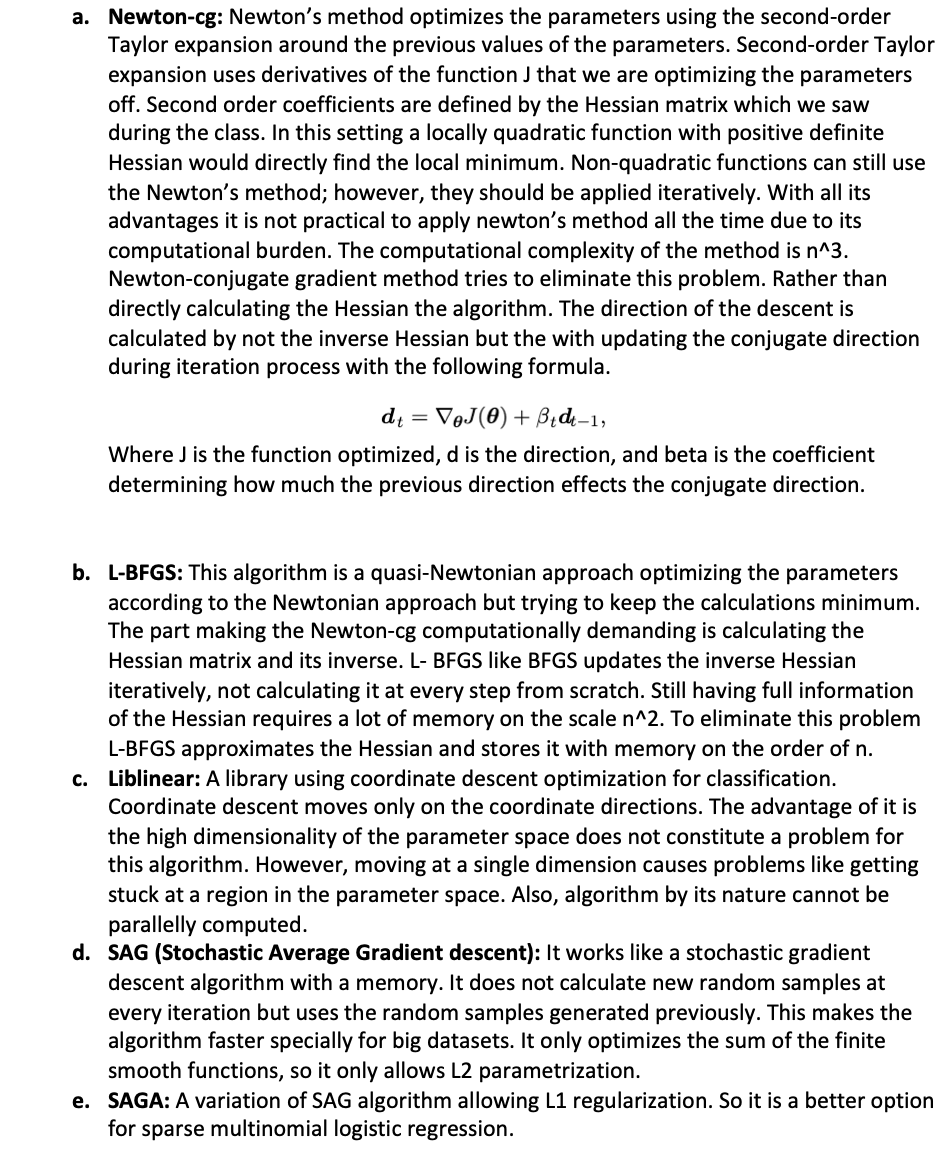

Q5) [10 points] Download the dataset called ‘country_information.xlsx’ that can be found under the ‘Data’ tab on BlackBoard. Do the following:
- a. [5 points] Provide a summary of what the dataset is about (around 100 words) by checking the variable names (you may need to do some Googling here).
- b. [5 points] Excluding the ‘country’ column, apply 0-1 normalization on the numeric columns. Save the resulting dataset as:
‘country_information_normalized.xlsx’ [Note: Do not forget to add the ‘country’ column to the normalized dataset. For normalization, you can use a package.]

a)

This dataset is about the metrics about the countries. For example, gini index is the metric for the income inequality. When it is high, the country is the high rate of the income inequality. The other indexes are gini_index, corruption_perceptions_index, freedom_house_democracy_index, hdi, press_freedom_index, economist_democracy_index, populism_index, effective_coverage_of_health_services_index, trust_in_news_media_index, trust_in_government_index, trust_in_science_index. Corruption_perceptions_index is about the perception of the corruption of the country. When it is high, the population is more avare about the corruption. Press_freedom_index is the index to show how the journalist and media are freely express their ideas. Populism_index is the metric which shows the amount of the populist behavior of the population. The other indexes are self explanatory and the name describes themselves enough.

b)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

scaler = MinMaxScaler(feature_range=(0, 1))
data = pd.read_excel('country_information.xlsx', index_col=0)

data.head()

gini_index  corruption_perceptions_index  \
country                                                 
Afghanistan    40.09274                          19.0   
Albania        33.20000                          36.0   
Algeria        27.60000                          36.0   
Argentina      42.90000                          42.0   
Australia      34.40000                          77.0   

             freedom_house_democracy_index  hdi  press_freedom_index  \
country                                                                
Afghanistan                              1  1.0                  2.0   
Albania                                  2  3.0                  3.0   
Algeria                                  1  3.0                  2.0   
Argentina                                3  4.0                  3.0   
Australia                                3  4.0                  4.0   

             economist_democracy_index  populism_index  \
country                                                  
Afghanistan                        1.0        4.092874   
Albania                            2.0        4.940516   
Algeria                            2.0        4.850953   
Argentina                          3.0        8.000000   
Australia                          4.0        5.783460   

             effective_coverage_of_health_services_index  \
country                                                    
Afghanistan                                         39.0   
Albania                                             70.0   
Algeria                                             65.0   
Argentina                                           61.0   
Australia                                           89.0   

             trust_in_news_media_index  trust_in_government_index  \
country                                                             
Afghanistan                  40.572215                  69.321806   
Albania                      33.325007                  54.745606   
Algeria                      31.516623                  68.974562   
Argentina                    39.000000                  31.000000   
Australia                    44.000000                  42.000000   

             trust_in_science_index  
country                              
Afghanistan                    10.0  
Albania                        10.0  
Algeria                         5.0  
Argentina                      21.0  
Australia                      33.0

In [ ]:
numerical_features = ['gini_index', 'corruption_perceptions_index', 'freedom_house_democracy_index', 'hdi', 'press_freedom_index', 'economist_democracy_index', 'populism_index', 'effective_coverage_of_health_services_index', 'trust_in_news_media_index', 'trust_in_government_index', 'trust_in_science_index']
label_feature = 'country'
newdata = data
scaler.fit(data[numerical_features])
newdata[numerical_features] =  scaler.transform(data[numerical_features])

newdata.head()

gini_index  corruption_perceptions_index  \
country                                                 
Afghanistan    0.415418                      0.092105   
Albania        0.239518                      0.315789   
Algeria        0.096609                      0.315789   
Argentina      0.487058                      0.394737   
Australia      0.270142                      0.855263   

             freedom_house_democracy_index       hdi  press_freedom_index  \
country                                                                     
Afghanistan                            0.0  0.000000                 0.25   
Albania                                0.5  0.666667                 0.50   
Algeria                                0.0  0.666667                 0.25   
Argentina                              1.0  1.000000                 0.50   
Australia                              1.0  1.000000                 0.75   

             economist_democracy_index  populism_index  \
country                                                  
Afghanistan                   0.000000        0.441839   
Albania                       0.333333        0.562931   
Algeria                       0.333333        0.550136   
Argentina                     0.666667        1.000000   
Australia                     1.000000        0.683351   

             effective_coverage_of_health_services_index  \
country                                                    
Afghanistan                                     0.109375   
Albania                                         0.593750   
Algeria                                         0.515625   
Argentina                                       0.453125   
Australia                                       0.890625   

             trust_in_news_media_index  trust_in_government_index  \
country                                                             
Afghanistan                   0.501952                   0.743412   
Albania                       0.306081                   0.519163   
Algeria                       0.257206                   0.738070   
Argentina                     0.459459                   0.153846   
Australia                     0.594595                   0.323077   

             trust_in_science_index  
country                              
Afghanistan                0.153846  
Albania                    0.153846  
Algeria                    0.057692  
Argentina                  0.365385  
Australia                  0.596154

In [ ]:
newdata.to_excel("country_information_normalized.xlsx")

Q6) [10 points] Code the kmeans++ algorithm from scratch (you can use packages such as numpy and pandas to store the data). For more information about the individual steps of the algorithm, please check here:
https://en.wikipedia.org/wiki/K-means%2B%2B.

As input, your algorithm should take a numpy matrix or a pandas dataframe and a k value that denotes the expected number of clusters. The output needs to be the labels associated with feature vectors coming from your dataset.

Note: You are welcome to use pre-packaged algorithms to calculate distances and means. If you need to pick a point randomly, please do the following:
- i. Import the random package of Python.
- ii. Set seed to 265 by running the following line: random.seed(265) [This should be done at the very beginning of your code file, after importing the packages.]
- iii. Run the following line: randrange(0,len(name_of_your_dataset),1). Use the resulting the number as the index number for the data point that should be randomly picked in different stages of the kmeans++ algorithm.

In [ ]:
import numpy as np
import pandas as pd
import random

random.seed(265)

numerical_features = ['gini_index', 'corruption_perceptions_index', 'freedom_house_democracy_index', 'hdi', 'press_freedom_index', 'economist_democracy_index', 'populism_index', 'effective_coverage_of_health_services_index', 'trust_in_news_media_index', 'trust_in_government_index', 'trust_in_science_index']
label_feature = 'country'

def get_label_from_sample(sample):
    return sample[label_feature]

def get_features_from_sample(sample):
    return np.float32(sample[numerical_features].to_numpy()[:-1])

def euclidean_distance(sample1, sample2):
        return np.sqrt(np.sum(np.square(sample1 - sample2)))
    
def initializekplusplus(datapd, k):
    
    centroids = []
    centroids.append(np.array(datapd.iloc[random.randrange(0,len(datapd),1), :])) 
    #the first initialization point is constant since we setup seed
   
    for c_id in range(k - 1):
        
        dist = []
        for i in range(len(datapd)):
            point = np.array(datapd.iloc[i])
            d = 999999999999999999999999999999999999999 #interestingly high number
             
            for j in range(len(centroids)):
                temp_dist = np.power(euclidean_distance(point, centroids[j]), 2)
                d = min(d, temp_dist)
            dist.append(d) 
             
        dist = np.array(dist)
        next_centroid = np.array(datapd.iloc[np.argmax(dist)]) #distance is selected according to maximum distance
        centroids.append(next_centroid)
     
    return centroids

def findgroup(cluster, item):
    #finds the group of the input features according to minimum distances
    minimum = 999999999999999999999999999999999999999 #ridiclusly high number
    index = -1
  
    for i in range(len(cluster)):
        distance = euclidean_distance(item, cluster[i])
  
        if (distance < minimum):
            minimum = distance
            index = i
      
    return index

def newcluster(size, cluster, item):
    #updates the centroid of the cluster with input feature
    clusternew = np.zeros(len(cluster))
    
    for i in range(len(cluster)):
        coord = cluster[i]
        coord = (coord*(size-1)+item[i])/float(size)
        clusternew[i] = coord
      
    return clusternew

def findkmeans(datapd, k):
    #let maximum iteration
    itermax = 10000
    initialcluster = initializekplusplus(datapd, k)
    clusterSizes= [0 for i in range(len(initialcluster))]
    current = [0 for i in range(len(datapd))]
    
    for mainloop in range(itermax):
  
        ifnoChange = 1;
        for i in range(len(datapd)):
  
            item = np.array(datapd.iloc[i])
         
            index = findgroup(initialcluster, item)
  
            clusterSizes[index] += 1
            
            #updating the coords of each cluster center with iterating all data one by one
            initialcluster[index] = newcluster(clusterSizes[index], initialcluster[index], item)
  
            #if all of the labels are clustered correctly noChange becomes True
            if(index != current[i]):
                ifnoChange = 0
  
            current[i] = index
    
        #stopping criteria if we cluster all data correctly
        if (ifnoChange):
            break
  
    return initialcluster

def whichcluster(cluster, datapd):
    #returns the labels of each data in the dataset after the clustering
    clusters = [[] for i in range(len(cluster))]
    items = np.array(datapd)  
    index = np.empty(items.shape[0])
    i = 0
    for item in items:
        #print(i)
        #print(item)
        #print(findgroup(cluster, item))
        index[i] = findgroup(cluster, item)
        i += 1
    return index

Q7)[10 points] Now, we will test the code we have written in Q6 and apply dimension reduction: Specifically, do the following:
- a. [5 points]. Set the random seed to 265 again (to (re-)guarantee the same initialization). Set k = 6. Run your kmeans++ code on the ‘country_information_normalized.xlsx’ dataset by excluding the ‘country’ column.
Record the labels. Attach the labels as a new column to your dataset by naming your new variable as kmeans_label.
- b. [5 points] Excluding the ‘country’ and ‘kmeans_label’ columns, run dimension reduction (specifically PCA) on your dataset by using sklearn’s PCA function: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.
[Note: set n_components = 2 and random_state = 265. Other parameters should be left as ‘default’.]. Add the new variables in your dataset as pca_dim_1 and pca_dim_2.

a)

In [ ]:
random.seed(265)

datascaled = pd.read_excel('country_information_normalized.xlsx', index_col=0)

datascaled.head()

gini_index  corruption_perceptions_index  \
country                                                 
Afghanistan    0.415418                      0.092105   
Albania        0.239518                      0.315789   
Algeria        0.096609                      0.315789   
Argentina      0.487058                      0.394737   
Australia      0.270142                      0.855263   

             freedom_house_democracy_index       hdi  press_freedom_index  \
country                                                                     
Afghanistan                            0.0  0.000000                 0.25   
Albania                                0.5  0.666667                 0.50   
Algeria                                0.0  0.666667                 0.25   
Argentina                              1.0  1.000000                 0.50   
Australia                              1.0  1.000000                 0.75   

             economist_democracy_index  populism_index  \
country                                                  
Afghanistan                   0.000000        0.441839   
Albania                       0.333333        0.562931   
Algeria                       0.333333        0.550136   
Argentina                     0.666667        1.000000   
Australia                     1.000000        0.683351   

             effective_coverage_of_health_services_index  \
country                                                    
Afghanistan                                     0.109375   
Albania                                         0.593750   
Algeria                                         0.515625   
Argentina                                       0.453125   
Australia                                       0.890625   

             trust_in_news_media_index  trust_in_government_index  \
country                                                             
Afghanistan                   0.501952                   0.743412   
Albania                       0.306081                   0.519163   
Algeria                       0.257206                   0.738070   
Argentina                     0.459459                   0.153846   
Australia                     0.594595                   0.323077   

             trust_in_science_index  
country                              
Afghanistan                0.153846  
Albania                    0.153846  
Algeria                    0.057692  
Argentina                  0.365385  
Australia                  0.596154

In [ ]:
numerical_features = ['gini_index', 'corruption_perceptions_index', 'freedom_house_democracy_index', 'hdi', 'press_freedom_index', 'economist_democracy_index', 'populism_index', 'effective_coverage_of_health_services_index', 'trust_in_news_media_index', 'trust_in_government_index', 'trust_in_science_index']
label_feature = 'country'

random.seed(265)
clustersfitted = findkmeans(datascaled[numerical_features], 6)
print(clustersfitted)

[array([0.22222823, 0.64649123, 1.        , 1.        , 0.7       ,
       0.71111111, 0.61218391, 0.83177083, 0.22252252, 0.38590176,
       0.25512821]), array([0.37771482, 0.15723684, 0.        , 0.18655897, 0.2       ,
       0.05230521, 0.47223474, 0.2625    , 0.5423269 , 0.62557583,
       0.32279027]), array([0.38647953, 0.28965356, 0.57017544, 0.29934149, 0.44030451,
       0.44578279, 0.46363739, 0.25836347, 0.58776893, 0.66701581,
       0.26523027]), array([0.25084937, 0.35246856, 0.1460177 , 0.78466077, 0.25      ,
       0.13274336, 0.50243632, 0.52212389, 0.42786836, 0.6042051 ,
       0.24196428]), array([0.21111176, 0.83805668, 1.        , 1.        , 0.90384615,
       0.95726496, 0.7151731 , 0.85176282, 0.67652014, 0.40365517,
       0.5300789 ]), array([0.39291369, 0.46418882, 0.78865979, 0.87285223, 0.48453608,
       0.66666667, 0.66532841, 0.58489046, 0.45533961, 0.44021056,
       0.22045995])]


In [ ]:
kmeans_labels = whichcluster(clustersfitted, datascaled[numerical_features])
print(kmeans_labels)

[1. 3. 3. 5. 4. 4. 3. 3. 4. 2. 3. 5. 5. 2. 1. 1. 4. 5. 3. 5. 1. 4. 5. 3.
 0. 4. 2. 1. 5. 3. 2. 4. 1. 2. 4. 0. 3. 2. 3. 4. 2. 0. 2. 2. 2. 5. 4. 2.
 2. 3. 1. 4. 5. 0. 2. 0. 3. 3. 2. 2. 3. 1. 5. 3. 3. 5. 2. 2. 5. 1. 2. 3.
 5. 5. 2. 1. 2. 4. 4. 2. 1. 3. 3. 2. 2. 5. 5. 2. 5. 4. 3. 5. 3. 1. 3. 2.
 5. 5. 0. 5. 0. 1. 4. 5. 1. 4. 4. 1. 0. 1. 2. 3. 2. 5. 3. 2. 1. 3. 3. 4.
 0. 4. 1. 2. 3. 3. 1. 1.]


In [ ]:
datascaled['kmeans_label'] = kmeans_labels.astype(int)
datascaled.head()


gini_index  corruption_perceptions_index  \
country                                                 
Afghanistan    0.415418                      0.092105   
Albania        0.239518                      0.315789   
Algeria        0.096609                      0.315789   
Argentina      0.487058                      0.394737   
Australia      0.270142                      0.855263   

             freedom_house_democracy_index       hdi  press_freedom_index  \
country                                                                     
Afghanistan                            0.0  0.000000                 0.25   
Albania                                0.5  0.666667                 0.50   
Algeria                                0.0  0.666667                 0.25   
Argentina                              1.0  1.000000                 0.50   
Australia                              1.0  1.000000                 0.75   

             economist_democracy_index  populism_index  \
country                                                  
Afghanistan                   0.000000        0.441839   
Albania                       0.333333        0.562931   
Algeria                       0.333333        0.550136   
Argentina                     0.666667        1.000000   
Australia                     1.000000        0.683351   

             effective_coverage_of_health_services_index  \
country                                                    
Afghanistan                                     0.109375   
Albania                                         0.593750   
Algeria                                         0.515625   
Argentina                                       0.453125   
Australia                                       0.890625   

             trust_in_news_media_index  trust_in_government_index  \
country                                                             
Afghanistan                   0.501952                   0.743412   
Albania                       0.306081                   0.519163   
Algeria                       0.257206                   0.738070   
Argentina                     0.459459                   0.153846   
Australia                     0.594595                   0.323077   

             trust_in_science_index  kmeans_label  
country                                            
Afghanistan                0.153846             1  
Albania                    0.153846             3  
Algeria                    0.057692             3  
Argentina                  0.365385             5  
Australia                  0.596154             4

In [ ]:
datascaled.to_excel("country_information_normalized_klabels.xlsx")

b) 

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array(datascaled[numerical_features])
pca = PCA(n_components=2, random_state = 265)
pca.fit(X)
X_new = pca.transform(X)

In [ ]:
print(X_new)

[[-1.08438813  0.27714785]
 [-0.05531027 -0.11765483]
 [-0.46534381 -0.37206154]
 [ 0.59699884 -0.00496227]
 [ 1.07502332 -0.0421412 ]
 [ 1.04594574 -0.06242958]
 [-0.81221334 -0.35308425]
 [-0.41481802 -0.73371275]
 [ 1.00333055 -0.03847292]
 [-0.35064541  0.04087153]
 [-0.11743673 -0.07835769]
 [ 0.37677581  0.3330892 ]
 [ 0.45085194 -0.04515626]
 [-0.38520082  0.66352799]
 [-1.08843513  0.11556383]
 [-0.89706117  0.05472418]
 [ 1.07916271 -0.00363341]
 [ 0.83563502  0.0460258 ]
 [-0.68630205 -0.43260783]
 [ 0.09560656 -0.07698455]
 [-0.9081054   0.04149202]
 [ 1.00876909  0.16867819]
 [ 0.66341154 -0.13364955]
 [-0.56928588 -0.54660607]
 [ 0.82688951 -0.15805295]
 [ 1.16014939  0.10919082]
 [-0.0163475   0.16508494]
 [-1.03935226  0.23559424]
 [ 0.10622213  0.05131643]
 [-0.7347001  -0.38833354]
 [-0.11277932  0.30510982]
 [ 0.91925919 -0.01827347]
 [-0.86805029  0.26218227]
 [-0.19963247  0.13294933]
 [ 1.20329121  0.0698135 ]
 [ 1.04732745 -0.17418966]
 [-0.69780816 -0.30641396]
 

In [ ]:
datascaled['pca_dim_1'] = X_new[:, 0]
datascaled['pca_dim_2'] = X_new[:, 1]
datascaled.head()

gini_index  corruption_perceptions_index  \
country                                                 
Afghanistan    0.415418                      0.092105   
Albania        0.239518                      0.315789   
Algeria        0.096609                      0.315789   
Argentina      0.487058                      0.394737   
Australia      0.270142                      0.855263   

             freedom_house_democracy_index       hdi  press_freedom_index  \
country                                                                     
Afghanistan                            0.0  0.000000                 0.25   
Albania                                0.5  0.666667                 0.50   
Algeria                                0.0  0.666667                 0.25   
Argentina                              1.0  1.000000                 0.50   
Australia                              1.0  1.000000                 0.75   

             economist_democracy_index  populism_index  \
country                                                  
Afghanistan                   0.000000        0.441839   
Albania                       0.333333        0.562931   
Algeria                       0.333333        0.550136   
Argentina                     0.666667        1.000000   
Australia                     1.000000        0.683351   

             effective_coverage_of_health_services_index  \
country                                                    
Afghanistan                                     0.109375   
Albania                                         0.593750   
Algeria                                         0.515625   
Argentina                                       0.453125   
Australia                                       0.890625   

             trust_in_news_media_index  trust_in_government_index  \
country                                                             
Afghanistan                   0.501952                   0.743412   
Albania                       0.306081                   0.519163   
Algeria                       0.257206                   0.738070   
Argentina                     0.459459                   0.153846   
Australia                     0.594595                   0.323077   

             trust_in_science_index  kmeans_label  pca_dim_1  pca_dim_2  
country                                                                  
Afghanistan                0.153846             1  -1.084388   0.277148  
Albania                    0.153846             3  -0.055310  -0.117655  
Algeria                    0.057692             3  -0.465344  -0.372062  
Argentina                  0.365385             5   0.596999  -0.004962  
Australia                  0.596154             4   1.075023  -0.042141

In [ ]:
datascaled.to_excel("country_information_normalized_alllabels.xlsx")

Q8) [10 points] Now, let’s visualize the results, use the clustering labels to color our data points, and present them in convex hulls. Run the code provided to you in the ‘visualization_code.py’ file.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

mpl.rcParams['figure.dpi'] = 600
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 10

df = pd.read_excel('country_information_normalized_alllabels.xlsx')
pal = sns.color_palette("Paired")[:len(set(df['kmeans_label']))]
p1 = sns.scatterplot(x="pca_dim_1", y='pca_dim_2', hue='kmeans_label', palette = pal, data=df, s=250, alpha=0.7, legend=False)


#For each point, we add a text inside the bubble
for line in range(0,df.shape[0]):
     p1.text(df.pca_dim_1[line], df.pca_dim_2[line], df.country[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.suptitle('Two-Dimensional Map of Countries (PCA)', fontsize=36)
plt.xlabel('PCA - Dimension 1', fontsize=24)
plt.ylabel('PCA - Dimension 2', fontsize=24)

from scipy import interpolate
from scipy.spatial import ConvexHull

for i in df.kmeans_label.unique():
    # get the convex hull
    points = df[df.kmeans_label == i][['pca_dim_1', 'pca_dim_2']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    
    # interpolate
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    # plot shape
    plt.fill(interp_x, interp_y, '--', c=pal[i], alpha=0.2)
    

plt.grid()
plt.show()

In [ ]:
df['kmeans_label'].value_counts()

2    29
3    28
5    23
1    20
4    19
0     9
Name: kmeans_label, dtype: int64

Q9) [10 points] Interpret the results (in around 300 words) by answering the following:
a. [2.5 points] Which countries seem to be similar? Why do you think these countries are clustered together?
b. [2.5 points] If you run the kmeans++ algorithm more than once, do you think the results will change?
c. [2.5 points] (Subjectively speaking) Do you think this is an accurate clustering of the countries? Would the results change greatly if we had different social/economic variables?
d. [2.5 points] Do you think PCA may have affected the results at all? In other words, if we had a different number of principle components, would our visual interpretation be different?

a)

In [ ]:
df.loc[df['kmeans_label'] == 0]

country  gini_index  corruption_perceptions_index  \
24   Czech Republic    0.030258                      0.552632   
35           France    0.219103                      0.750000   
41           Greece    0.231863                      0.500000   
53            Italy    0.308421                      0.539474   
55            Japan    0.231863                      0.815789   
98         Slovakia    0.030258                      0.486842   
100     South Korea    0.193583                      0.644737   
108          Taiwan    0.188314                      0.697368   
120   United States    0.448778                      0.723684   

     freedom_house_democracy_index  hdi  press_freedom_index  \
24                             1.0  1.0                 0.75   
35                             1.0  1.0                 0.75   
41                             1.0  1.0                 0.50   
53                             1.0  1.0                 0.75   
55                             1.0  1.0                 0.50   
98                             1.0  1.0                 0.75   
100                            1.0  1.0                 0.75   
108                            1.0  1.0                 0.75   
120                            1.0  1.0                 0.75   

     economist_democracy_index  populism_index  \
24                    0.666667        1.000000   
35                    1.000000        0.714286   
41                    0.666667        0.629071   
53                    0.666667        0.142857   
55                    0.666667        0.705537   
98                    0.666667        0.857143   
100                   0.666667        0.681939   
108                   0.666667        0.658484   
120                   0.666667        0.285714   

     effective_coverage_of_health_services_index  trust_in_news_media_index  \
24                                      0.781250                   0.297297   
35                                      0.921875                   0.054054   
41                                      0.750000                   0.135135   
53                                      0.890625                   0.486486   
55                                      1.000000                   0.459459   
98                                      0.718750                   0.297297   
100                                     0.890625                   0.000000   
108                                     0.734375                   0.162162   
120                                     0.781250                   0.270270   

     trust_in_government_index  trust_in_science_index  kmeans_label  \
24                    0.447056                0.596154             0   
35                    0.169231                0.365385             0   
41                    0.434012                0.153846             0   
53                    0.338462                0.288462             0   
55                    0.276923                0.173077             0   
98                    0.563973                0.307692             0   
100                   0.415385                0.076923             0   
108                   0.583785                0.038462             0   
120                   0.292308                0.442308             0   

     pca_dim_1  pca_dim_2  
24    0.826890  -0.158053  
35    1.047327  -0.174190  
41    0.615892  -0.180351  
53    0.717690  -0.060388  
55    0.828547  -0.273058  
98    0.730192  -0.102657  
100   0.790247  -0.222545  
108   0.737013  -0.121211  
120   0.767957  -0.081151

When k = 0, the abovementioned countries are returned. I think the PCA dimension 1 is about the economic development, and PCA dimension 2 is about the socially balance. For example if PCA 2 is about 0, the country is balanced in the distribution of the freedom perception and corruption perception. If PCA 2 is higher than 0 or lower than 0, this means the country may be socially inbalanced and return to inbalanced freedom or corruption perception. 

In [ ]:
df.loc[df['kmeans_label'] == 1]

country  gini_index  corruption_perceptions_index  \
0    Afghanistan    0.415418                      0.092105   
14       Burundi    0.377324                      0.092105   
15      Cameroon    0.581480                      0.171053   
20         Congo    0.640175                      0.092105   
27      DR Congo    0.466642                      0.078947   
32      Ethiopia    0.285454                      0.342105   
50          Iraq    0.145096                      0.118421   
61    Kyrgyzstan    0.150200                      0.250000   
69          Mali    0.234415                      0.236842   
75       Myanmar    0.175720                      0.210526   
80   North Korea    0.400640                      0.078947   
93        Rwanda    0.507473                      0.552632   
101  South Sudan    0.517681                      0.000000   
104        Sudan    0.265038                      0.052632   
107        Syria    0.349252                      0.026316   
109   Tajikistan    0.259934                      0.171053   
116       Uganda    0.484506                      0.197368   
122   Uzbekistan    0.293109                      0.184211   
126        Yemen    0.328837                      0.039474   
127     Zimbabwe    0.675902                      0.157895   

     freedom_house_democracy_index       hdi  press_freedom_index  \
0                              0.0  0.000000                 0.25   
14                             0.0  0.000000                 0.00   
15                             0.0  0.333333                 0.25   
20                             0.0  0.333333                 0.25   
27                             0.0  0.000000                 0.25   
32                             0.0  0.000000                 0.50   
50                             0.0  0.333333                 0.00   
61                             0.0  0.333333                 0.50   
69                             0.0  0.000000                 0.50   
75                             0.0  0.333333                 0.25   
80                             0.0  0.397846                 0.00   
93                             0.0  0.000000                 0.25   
101                            0.0  0.000000                 0.25   
104                            0.0  0.000000                 0.00   
107                            0.0  0.333333                 0.00   
109                            0.0  0.333333                 0.00   
116                            0.0  0.000000                 0.25   
122                            0.0  0.666667                 0.25   
126                            0.0  0.000000                 0.00   
127                            0.0  0.333333                 0.25   

     economist_democracy_index  populism_index  \
0                     0.000000        0.441839   
14                    0.000000        0.467465   
15                    0.000000        0.459492   
20                    0.000000        0.455761   
27                    0.000000        0.454736   
32                    0.000000        0.496052   
50                    0.000000        0.491534   
61                    0.333333        0.503950   
69                    0.333333        0.461633   
75                    0.000000        0.467229   
80                    0.000000        0.477218   
93                    0.000000        0.553177   
101                   0.046104        0.436932   
104                   0.000000        0.468527   
107                   0.000000        0.483650   
109                   0.000000        0.454912   
116                   0.333333        0.490870   
122                   0.000000        0.432808   
126                   0.000000        0.455936   
127                   0.000000        0.490976   

     effective_coverage_of_health_services_index  trust_in_news_media_index  \
0                                       0.109375                   0.501952   
14                                      0.28125

These countries are economically inbalanced and their corruption index is low. Freedom index is 0. They are inbalanced social distribution.

In [ ]:
df.loc[df['kmeans_label'] == 2]

country  gini_index  corruption_perceptions_index  \
9               Bolivia    0.453882                      0.250000   
13         Burkina Faso    0.293109                      0.368421   
26   Dominican Republic    0.461538                      0.210526   
30          El Salvador    0.382428                      0.315789   
33                 Fiji    0.328837                      0.314590   
37               Gambia    0.308421                      0.328947   
40                Ghana    0.502369                      0.407895   
42            Guatemala    0.624863                      0.171053   
43               Guinea    0.252278                      0.210526   
44             Honduras    0.622311                      0.157895   
47                India    0.303317                      0.368421   
48            Indonesia    0.367116                      0.328947   
54          Ivory Coast    0.451330                      0.315789   
58                Kenya    0.433467                      0.250000   
59               Kosovo    0.132337                      0.315789   
66           Madagascar    0.479402                      0.171053   
67               Malawi    0.532993                      0.236842   
70               Mexico    0.550857                      0.250000   
74              Morocco    0.400291                      0.368421   
76                Nepal    0.229311                      0.276316   
79              Nigeria    0.288006                      0.171053   
83             Pakistan    0.198687                      0.250000   
84     Papua-New-Guinea    0.461538                      0.197368   
87          Philippines    0.471746                      0.289474   
95              Senegal    0.420707                      0.434211   
110            Tanzania    0.425811                      0.342105   
112               Timor    0.124681                      0.368421   
115              Tuvalu    0.390084                      0.292510   
123             Vanuatu    0.351804                      0.407895   

     freedom_house_democracy_index       hdi  press_freedom_index  \
9                              0.5  0.666667             0.250000   
13                             0.5  0.000000             0.750000   
26                             0.5  0.666667             0.500000   
30                             0.5  0.333333             0.500000   
33                             0.5  0.666667             0.500000   
37                             0.5  0.000000             0.500000   
40                             1.0  0.333333             0.750000   
42                             0.5  0.333333             0.250000   
43                             0.5  0.000000             0.500000   
44                             0.5  0.333333             0.250000   
47                             0.5  0.333333             0.250000   
48                             0.5  0.666667             0.250000   
54                             0.5  0.000000             0.500000   
58                             0.5  0.333333             0.500000   
59                             0.5  0.590249             0.500000   
66                             0.5  0.000000             0.500000   
67                             0.5  0.000000             0.500000   
70                             0.5  0.666667             0.250000   
74                             0.5  0.333333             0.250000   
76                             0.5  0.333333             0.250000   
79                             0.5  0.000000             0.250000   
83                             0.5  0.333333             0.250000   
84                             0.5  0.333333             0.750000   
87                             0.5  0.666667             0.250000   
95                             0.5  0.000000             0.750000   
110                            0.5  0.000000             0.250000   
112                            1.0  0.333333             0.500000   
115          

These countries have freedom perception in average and little amount of corruption index.

In [ ]:
df.loc[df['kmeans_label'] == 3]

country  gini_index  corruption_perceptions_index  \
1                   Albania    0.239518                      0.315789   
2                   Algeria    0.096609                      0.315789   
6                Azerbaijan    0.071090                      0.236842   
7                   Belarus    0.037914                      0.460526   
10   Bosnia and Herzegovina    0.234415                      0.302632   
18                    China    0.374772                      0.394737   
23                     Cuba    0.295255                      0.460526   
29                    Egypt    0.196135                      0.276316   
36                    Gabon    0.362012                      0.236842   
38                  Georgia    0.308421                      0.578947   
49                     Iran    0.464090                      0.171053   
56                   Jordan    0.252278                      0.486842   
57               Kazakhstan    0.101713                      0.342105   
60                   Kuwait    0.280960                      0.394737   
63                  Lebanon    0.203791                      0.171053   
64                    Libya    0.377831                      0.065789   
71                  Moldova    0.048122                      0.289474   
81          North Macedonia    0.234415                      0.302632   
82                     Oman    0.259411                      0.552632   
90                    Qatar    0.229279                      0.671053   
92                   Russia    0.349252                      0.236842   
94             Saudi Arabia    0.245571                      0.539474   
111                Thailand    0.282902                      0.315789   
114                  Turkey    0.461538                      0.368421   
117                 Ukraine    0.071090                      0.276316   
118    United Arab Emirates    0.055778                      0.776316   
124               Venezuela    0.535545                      0.039474   
125                 Vietnam    0.303317                      0.315789   

     freedom_house_democracy_index       hdi  press_freedom_index  \
1                              0.5  0.666667                 0.50   
2                              0.0  0.666667                 0.25   
6                              0.0  0.666667                 0.00   
7                              0.0  1.000000                 0.25   
10                             0.5  0.666667                 0.50   
18                             0.0  0.666667                 0.00   
23                             0.0  0.666667                 0.00   
29                             0.0  0.666667                 0.00   
36                             0.0  0.666667                 0.25   
38                             0.5  1.000000                 0.50   
49                             0.0  0.666667                 0.00   
56                             0.0  0.666667                 0.25   
57                             0.0  1.000000                 0.25   
60                             0.5  1.000000                 0.50   
63                             0.5  0.666667                 0.50   
64                             0.0  0.666667                 0.00   
71                             0.5  0.666667                 0.50   
81                             0.5  0.666667                 0.50   
82                             0.0  1.000000                 0.25   
90                             0.0  1.000000                 0.25   
92                             0.0  1.000000                 0.25   
94                             0.0  1.000000                 0.00   
111                            0.0  0.666667                 0.25   
114                            0.0  1.000000                 0.25   
117                            0.5  0.666667                 0.50   
118                            0.0  1.000000                 0.25   
124                            0.0  0.6

These countries has freedom index low. They have some kind of corruption perception.

In [ ]:
df.loc[df['kmeans_label'] == 4]

country  gini_index  corruption_perceptions_index  \
4      Australia    0.270142                      0.855263   
5        Austria    0.178272                      0.842105   
8        Belgium    0.086401                      0.842105   
16        Canada    0.242070                      0.855263   
21    Costa Rica    0.622311                      0.592105   
25       Denmark    0.111921                      1.000000   
31       Estonia    0.165512                      0.828947   
34       Finland    0.088953                      0.960526   
39       Germany    0.206343                      0.894737   
46       Iceland    0.058330                      0.828947   
51       Ireland    0.193583                      0.789474   
77   Netherlands    0.109369                      0.921053   
78   New Zealand    0.155147                      1.000000   
89      Portugal    0.247174                      0.644737   
102        Spain    0.277798                      0.657895   
105       Sweden    0.157856                      0.960526   
106  Switzerland    0.236967                      0.960526   
119           UK    0.288006                      0.855263   
121      Uruguay    0.405395                      0.776316   

     freedom_house_democracy_index  hdi  press_freedom_index  \
4                              1.0  1.0                 0.75   
5                              1.0  1.0                 0.75   
8                              1.0  1.0                 1.00   
16                             1.0  1.0                 0.75   
21                             1.0  1.0                 1.00   
25                             1.0  1.0                 1.00   
31                             1.0  1.0                 1.00   
34                             1.0  1.0                 1.00   
39                             1.0  1.0                 1.00   
46                             1.0  1.0                 0.75   
51                             1.0  1.0                 1.00   
77                             1.0  1.0                 1.00   
78                             1.0  1.0                 1.00   
89                             1.0  1.0                 1.00   
102                            1.0  1.0                 0.75   
105                            1.0  1.0                 1.00   
106                            1.0  1.0                 1.00   
119                            1.0  1.0                 0.75   
121                            1.0  1.0                 0.75   

     economist_democracy_index  populism_index  \
4                     1.000000        0.683351   
5                     1.000000        0.857143   
8                     0.666667        0.665535   
16                    1.000000        0.857143   
21                    1.000000        0.571429   
25                    1.000000        0.672921   
31                    0.666667        0.664073   
34                    1.000000        0.678732   
39                    1.000000        1.000000   
46                    1.000000        0.691962   
51                    1.000000        0.670921   
77                    1.000000        0.714286   
78                    1.000000        0.682783   
89                    1.000000        0.613852   
102                   1.000000        0.714286   
105                   1.000000        0.857143   
106                   1.000000        0.707459   
119                   1.000000        0.428571   
121                   1.000000        0.714286   

     effective_coverage_of_health_services_index  trust_in_news_media_index  \
4                                       0.890625                   0.594595   
5                                       0.843750                   0.459459   
8                                       0.859375                   0.729730   
16                                      0.906250                   0.810811   
21                                      0.734375                   0.596797   
25          

These countries are highly developed and balanced countries in terms of economic distribution and have high corruption index.

In [ ]:
df.loc[df['kmeans_label'] == 5]

country  gini_index  corruption_perceptions_index  \
3       Argentina    0.487058                      0.394737   
11         Brazil    0.755013                      0.342105   
12       Bulgaria    0.446227                      0.421053   
17          Chile    0.525337                      0.723684   
19       Colombia    0.701422                      0.355263   
22        Croatia    0.150200                      0.460526   
28        Ecuador    0.558512                      0.355263   
45        Hungary    0.147648                      0.421053   
52         Israel    0.387532                      0.631579   
62         Latvia    0.288006                      0.592105   
65      Lithuania    0.303317                      0.631579   
68       Malaysia    0.441123                      0.513158   
72       Mongolia    0.226759                      0.302632   
73     Montenegro    0.374772                      0.434211   
85       Paraguay    0.558512                      0.210526   
86           Peru    0.451330                      0.342105   
88         Poland    0.162960                      0.578947   
91        Romania    0.305869                      0.421053   
96         Serbia    0.316077                      0.342105   
97      Singapore    0.000000                      0.960526   
99   South Africa    1.000000                      0.421053   
103     Sri Lanka    0.395188                      0.342105   
113       Tunisia    0.229311                      0.421053   

     freedom_house_democracy_index       hdi  press_freedom_index  \
3                              1.0  1.000000                 0.50   
11                             1.0  0.666667                 0.50   
12                             1.0  1.000000                 0.25   
17                             1.0  1.000000                 0.50   
19                             0.5  0.666667                 0.25   
22                             1.0  1.000000                 0.50   
28                             0.5  0.666667                 0.50   
45                             0.5  1.000000                 0.50   
52                             1.0  1.000000                 0.50   
62                             1.0  1.000000                 0.75   
65                             1.0  1.000000                 0.75   
68                             0.5  1.000000                 0.50   
72                             1.0  0.666667                 0.50   
73                             0.5  1.000000                 0.50   
85                             0.5  0.666667                 0.50   
86                             0.5  0.666667                 0.50   
88                             1.0  1.000000                 0.50   
91                             1.0  1.000000                 0.50   
96                             0.5  1.000000                 0.50   
97                             0.5  1.000000                 0.00   
99                             1.0  0.666667                 0.75   
103                            0.5  0.666667                 0.25   
113                            1.0  0.666667                 0.50   

     economist_democracy_index  populism_index  \
3                     0.666667        1.000000   
11                    0.666667        0.428571   
12                    0.666667        0.857143   
17                    1.000000        0.714286   
19                    0.666667        0.857143   
22                    0.666667        1.000000   
28                    0.666667        0.714286   
45                    0.666667        0.593538   
52                    0.666667        0.628168   
62                    0.666667        1.000000   
65                    0.666667        0.604431   
68                    0.666667        0.586474   
72                    0.666667        0.499891   
73                    0.333333        0.573379   
85                    0.666667        0.714286   
86                    0.666667        1.

These countries some kind of freedom index and they have average corruption perception. Their economic and social distribution is inbalanced.

b) In our implementation of kmeans++, the random seed is given. This means that every time our algorithm starts at same initial points. They will produce same result every time.

However, if we do not provide random seed at the beginning, the initial points may be different and may result in different result after classification. But kmeans++ is generally produces deterministic results and unwanted classification with kmeans++ is rare.

c) I think this is not 100% reliable clustering but it gives an idea. For example, USA has average income inbalance but it is classified with low income inbalanced countries. But this classification result in similar economist democracy index and hdi. If we had different social/economic variables, the results change significantly since all parameters are related with the social/economic variables and clustering is done with these variables.

d) PCA does not affect the kmeans++ results since it is not included in the kmeans++ algorithm. PCA is good to demonstrate all of the feaures in two dimension otherwise it is a pain to visualize the graph. if we increase PCA dimension 3, the graphic will be 3 dimensional and it may be more visually attractive but the countries with same k_labels stays close to eachother in 3d graph. So PCA dimension change does not affect the kmeans++ but it changes the visualization. We may estimate third dimension maybe related to freedom perception but I do not know before plotting and carefully investigating it.  